In this notebook, we are going to cover some of most fundamental concepts of Tensors using TENSORFLOW

To be covered:
- Introduction to tensors
- Getting information from tensors
- Manipulating Tensors
- Tensors and Numpy
- Using @tf.function (speeing up regular Python functions)
- Using GPU with Tensorflow (TPU)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [3]:
# Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# Check the number of dimesions of tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [5]:
# Creating a Vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
vector.ndim

1

In [7]:
# Create a matrix (has more than 1 dimesion)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim

2

In [9]:
# Creating a matrix having different data type
another_matrix = tf.constant([[10.,7.],
                              [3.,2.],
                              [8.,9.]], dtype=tf.float16) # specifying the datatype
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
another_matrix.ndim

2

In [11]:
# Creating a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim

3

What we have created so far:
- Scalar: A single number
- Vector: A number with direction
- Matrix: A 2D array of numbers
- Tensor: An n-dimensional array of numbers where n can  be (0 to any value)

### Creating Tensors with tf.Variable

In [13]:
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Let's try changing one of the elements in our changeable tensor
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [15]:
# Tryin Changing our Unchangeable Tensor
unchangeable_tensor[0].assign(7)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Creating Random Tensors
Random tensors are tensors of some arbitrary size which contain random numbers

In [16]:
# Create two random (but same) tensors
random_1 = tf.random.Generator.from_seed(42)  #set seed for reproducibility , seed is a kind of relation to the random numbers generated
random_1 = random_1.normal(shape=(3,2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [17]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

### Shuffling Order of Tensors

Why?
Suppose I want to classify Sphagetti and Ramen where first 5000 are Ramen and last 5000 are Sphagetti. Our Model might adjust itself thinking it want to train how only Ramen looks like instead of classifying between them. So tensors are randomized for better learning of model

In [18]:
# Shuffling such that inherent order does affect learning

not_shuffled = tf.constant([[10,7],
                            [3,4],
                            [2,5]])
not_shuffled.ndim

2

In [19]:
# Shuffle our non-shuffled Tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [20]:
shuffled = tf.random.shuffle(not_shuffled, seed=42)
shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

### Creating Tensors with Numpy Arrays

In [21]:
# Creating Tensors of all ones
tf.ones([5,7])

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [22]:
# Creating tensors of all zeros
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turning Numpy Arrays into Tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPT (much faster for numerical computing)

In [23]:
# We can also turn NumPy arrays into tensorflow tensors
import numpy as np
numpy_A = np.arange(1,25, dtype=np.int32)  #creating numpy array between 1 and 25

# X = tf.constant(some_matrix)  # capital for matrix or tensor
# y = tf.constant(vector) # non-captial for vector
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [24]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

In [25]:
B = tf.constant(numpy_A, shape=(2,3,4))
B

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

In [26]:
2 * 3 * 4  # product is 24, which must be equal to total number of elements

24

### Getting information from tensors
When dealing with tensors we want to be aware of the following attributes
* Shape - Type of Matrix/tensor
* Rank
* Axis or dimension - Number of dimensions
* Size - Total number of items

In [27]:
# Creating a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [28]:
rank_4_tensor[0]   #getting set of first 3 set of tensors

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [29]:
rank_4_tensor[0][1]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [30]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [31]:
# Get various attributes of our Tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of Dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of Tensor: ", rank_4_tensor.shape )
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor))

Datatype of every element:  <dtype: 'float32'>
Number of Dimensions (rank):  4
Shape of Tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)


### Indexing Tensors
Tensors can be indexed just like Python lists

In [32]:
# GEt the first 2 elements of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [33]:
# Get the first element each dimension from each index except the final one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [34]:
rank_2_tensor = tf.constant([[10,7],
                            [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [35]:
# Get the last item of each row of our rank 2 tensor
rank_2_tensor[:,-1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [36]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # the ... means include every axis previously
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [37]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # '-1' means the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [38]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor,axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

### Manipulating Tensors (tensor operations)
**Basic Operations**

`+` , `-` , `*` , `/`

In [39]:
# We can add  values to a tensor using addition operator
tensor = tf.constant([[10,7],[3,4]])
tensor + 10  #original tensor remains unchanged

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [40]:
# Multiplication
tensor1 = tensor*10
tensor1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [41]:
# Subtraction and Division is also possible

In [42]:
# We can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

### **Matrix Multiplication**

In [43]:
# Matrix multiplication in tensorflow
tf.matmul(tensor,tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [44]:
print(tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


In [45]:
# Matrix multiplication using Python @ variable
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [49]:
# Creating a tensor (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [50]:
# We cannot multiply X and Y unless their shapess are compatible
Y = tf.reshape(Y,shape=(2,3))
Y

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [51]:
tf.matmul(X,Y)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [52]:
X @ Y

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [53]:
# Matrix multiplication is not commutative
Y @ X

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 76, 100],
       [103, 136]], dtype=int32)>

In [55]:
# Can change shape with transpose, but it is different from reshape
X, tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [58]:
# Trying matrix multiplication with Transpose rather than reshape
tf.matmul(tf.transpose(X),tf.reshape(Y, shape=(3,2)))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Matrix multiplication is also called Dot Product.
We can perform Matrix multiplication using:
- `tf.matmul()`
- `tf.tensordot()`

In [59]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[ 7,  8,  9],
        [10, 11, 12]], dtype=int32)>)

In [61]:
tf.tensordot(X,Y, axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [63]:
# Performing Tensordot using X Tranposed and Y as Original
tf.tensordot(tf.transpose(X),tf.reshape(Y,shape=(3,2)),axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Generally, when performing matrix multiplication on two tensors and one of the axes doesn't lineup , then we will usually transpose(rather then reshape) to adjust and perform matrix multiplication.

### Changing Datatype of Tensors

In [64]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7,7.4])
B.dtype

tf.float32

In [65]:
C = tf.constant([10,7])
C.dtype

tf.int32

In [67]:
# Changing from float32 to float16 (reduced precision) - They take less space on memory and faster computation
D = tf.cast(B, dtype=tf.float16)
D

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [70]:
# Changing from int32 to float16
E = tf.cast(C, dtype=tf.float16)
E

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([10.,  7.], dtype=float16)>

### Aggregating Tensors
Aggregating Tensors = Condensing them from multiple values down to a smaller amount of values.

In [71]:
# Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [72]:
tf.abs(D)  # Taking all neg numbers and converts them to their absolute value

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [73]:
# Create a random tensor with random values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0,100,size=50))  # Gives  random 50 numbers between 0 to 100
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([67, 12, 22, 88, 98, 47, 34, 28, 59, 38, 54,  1, 24, 94, 80,  6, 72,
       50, 97, 39, 95, 89,  0, 82, 57,  7, 94, 37, 93, 59, 45, 43, 22, 66,
       17, 19, 66, 14, 26, 55, 98, 62, 18, 16, 27, 89, 34, 20, 54, 36])>

In [74]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [75]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [76]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [77]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=49>

In [78]:
# Find the sum of a tensor
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2450>

**Standard Deviation** - A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low, or small, standard deviation indicates data are clustered tightly around the mean.high, or large, standard deviation indicates data are more spread out.

**Variance** - Variance is a statistical measurement of the spread between numbers in a data set. It measures how far each number in the set is from the mean (average), and thus from every other number in the set. Variance is often depicted by this symbol: σ2.


For the calculations we use:
- `tf.math.reduce_std()` - Standard Deviation
- `tf.math.reduce_variance()` - Variance


**NOTE** - Standard Dev and Variance is supports float32 datatype and not int32, so we need to typecast to float32

In [83]:
# Standard Deviation of the numpy array
tf.math.reduce_std(tf.cast(E,dtype=tf.float32))   # We have to change data type to float32 and int32 is not supported

<tf.Tensor: shape=(), dtype=float32, numpy=29.74357>

In [82]:
# Variance of the numpy array
tf.math.reduce_variance(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=884.68>

### Find the positional maximum and minimum

In [85]:
# Create a new tensor for finding postional minimum and maximum
# Creating tensor with 50 random numbers
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

- `tf.math.argmax()` - Returns the index with the largest value across axes of a tensor.

- `tf.math.argmax(
    input,
    axis=None,
    output_type=tf.dtypes.int64,
    name=None
)`

- `tf.argmax()` - This also works similarly

In [89]:
# Find the postional maximum
tf.math.argmax(F)   #returns index

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [88]:
# Index on our largest value position
F[tf.argmax(F)]   #checking the value

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

- `tf.math.argmin()` - Returns the index with the smallest value across axes of a tensor.

- `tf.math.argmin(
    input,
    axis=None,
    output_type=tf.dtypes.int64,
    name=None
)`

- `tf.argmin()` - This also works similarly

In [90]:
# Find the postional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [91]:
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [92]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [93]:
G.shape

TensorShape([1, 1, 1, 1, 50])

- `tf.squeeze` - Removes dimensions of size 1 from the shape of a tensor.

- `tf.squeeze(
    input, axis=None, name=None
)`

In [94]:
G_squeezed = tf.squeeze(G)
G_squeezed

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [95]:
G_squeezed.shape

TensorShape([50])

### One Hot Encoding Tensors

- **Definition** - One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

- **Concept** : Most real-life datasets we encounter during our data science project development have columns of mixed data type. These datasets consist of both categorical as well as numerical columns. However, various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a Gender column with categorical elements like Male and  Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.



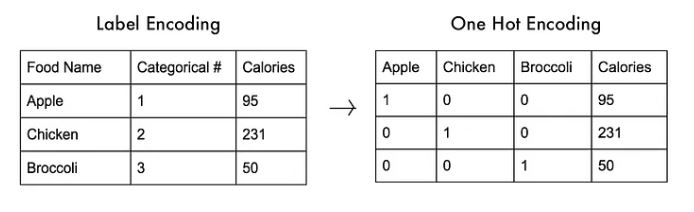

- `tf.one_hot()` - Returns a one-hot tensor.
- `tf.one_hot(
    indices,
    depth,
    on_value=None,
    off_value=None,
    axis=None,
    dtype=None,
    name=None
)
`

In [96]:
# Create a list of indices
some_list = [0, 1, 2, 3] # could be red,green, blue,purple

#one hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [97]:
# Specify custom values for One Hot Encoding
tf.one_hot(some_list, depth=4, on_value='Hello', off_value="World")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Hello', b'World', b'World', b'World'],
       [b'World', b'Hello', b'World', b'World'],
       [b'World', b'World', b'Hello', b'World'],
       [b'World', b'World', b'World', b'Hello']], dtype=object)>

### Squaring, Logarithm, Root

Its better to use tf.math module when using mathematical functions

In [98]:
# Creating a new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [99]:
# Squaring it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [100]:
# Square Root (int32 is not allowed , so we cast it to float32)
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [101]:
# Finding the Logarithm - Computes logarithm element wise (int32 similarly not allowed)
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

In [102]:
# Creating  a tensor directly from a NumPy array
J = tf.constant(np.array([3.,7.,10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [103]:
# Convert our tensor back to Numpy Array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [104]:
# Convert tensor J to a Numpy Array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [105]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3.,7.,10.]))
tensor_J = tf.constant([3.,7.,10.])

# Cheking the dataypes
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)